# Codsoft Task 1

### Importing Required modules

In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

### Loading Dataset

In [114]:
data=pd.read_csv("tested.csv")

In [115]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### Dataset Info

In [116]:
data.shape

(418, 12)

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [118]:
#Statistical measures of the data
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [119]:
data['Survived'].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

0-Non Survived
1-Survived

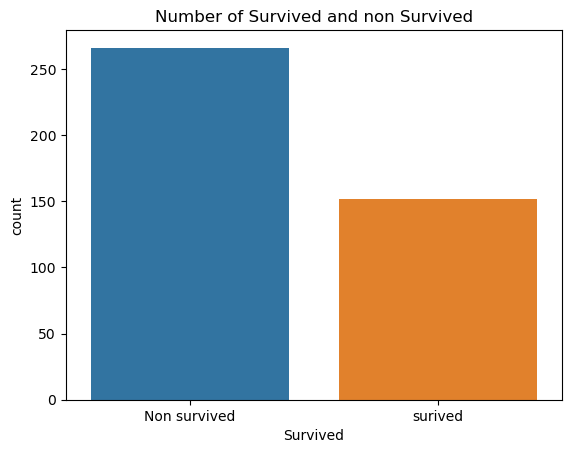

In [120]:
sns.countplot(x = 'Survived', data = data)
plt.title('Number of Survived and non Survived')
plt.xticks(range(2) , labels=['Non survived', 'surived'])
plt.show()

In [121]:
#check for null values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [122]:
data = data.dropna(subset=['Cabin','Age','Fare']).reset_index(drop=True)

In [123]:
#check for null values again after applying dropna()
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [124]:
#label encoding
data['sex']=data['Sex'].map({'male': 0, 'female': 1})

In [125]:
#converting categorical to numerical data
data=pd.get_dummies(data,columns=['Embarked'],prefix='Embarked',drop_first=True)

In [126]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,sex,Embarked_Q,Embarked_S
0,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,1,False,True
1,906,1,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,1,False,True
2,916,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,1,False,False
3,918,1,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,B36,1,False,False
4,920,0,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,A21,0,False,True


In [127]:
#Removing unnecessary column from the dataframe
data=data.drop(columns=['Cabin','Ticket','Sex','Name','PassengerId'])
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,sex,Embarked_Q,Embarked_S
0,1,1,23.0,1,0,82.2667,1,False,True
1,1,1,47.0,1,0,61.1750,1,False,True
2,1,1,48.0,1,3,262.3750,1,False,False
3,1,1,22.0,0,1,61.9792,1,False,False
4,0,1,41.0,0,0,30.5000,0,False,True


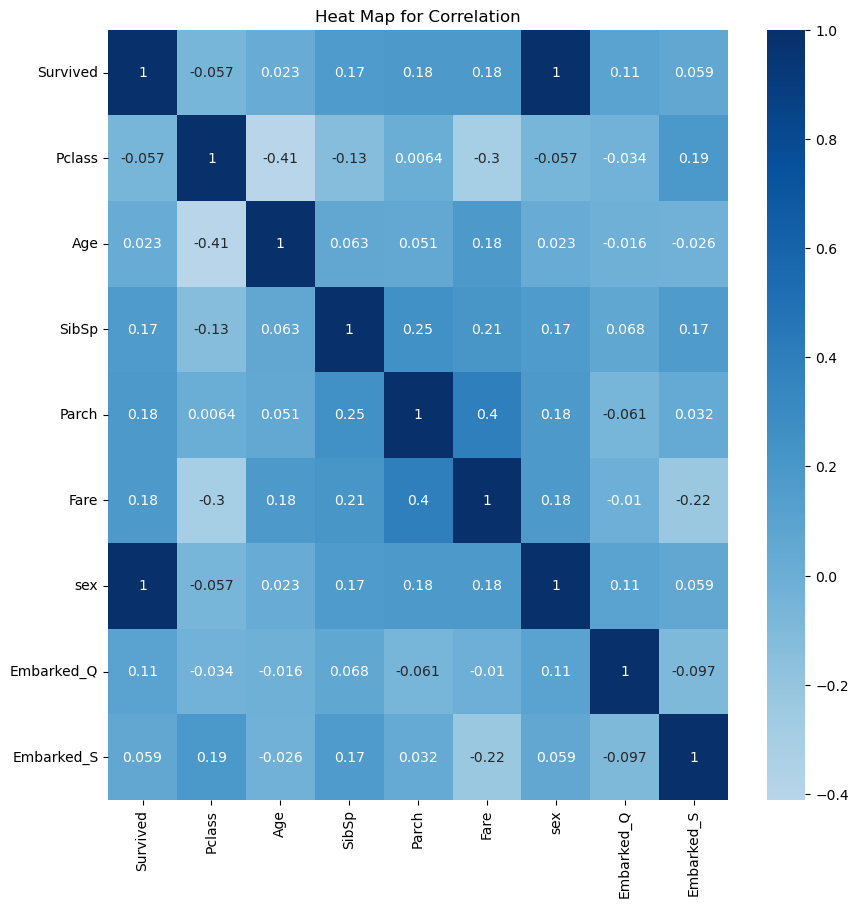

In [128]:
#create Heatmap
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,cmap='Blues',center=0)
plt.title("Heat Map for Correlation")
plt.show()

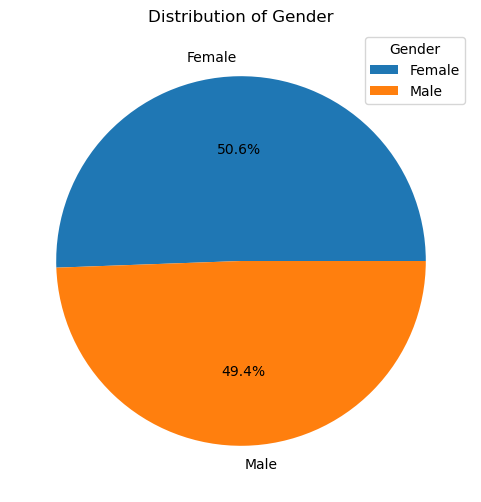

In [129]:
#Create Pie-chart for Gender distribution.
gender_counts=data['sex'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(gender_counts,labels=['Female','Male'],autopct='%1.1f%%')
plt.title("Distribution of Gender")
plt.legend(title='Gender')
plt.show()

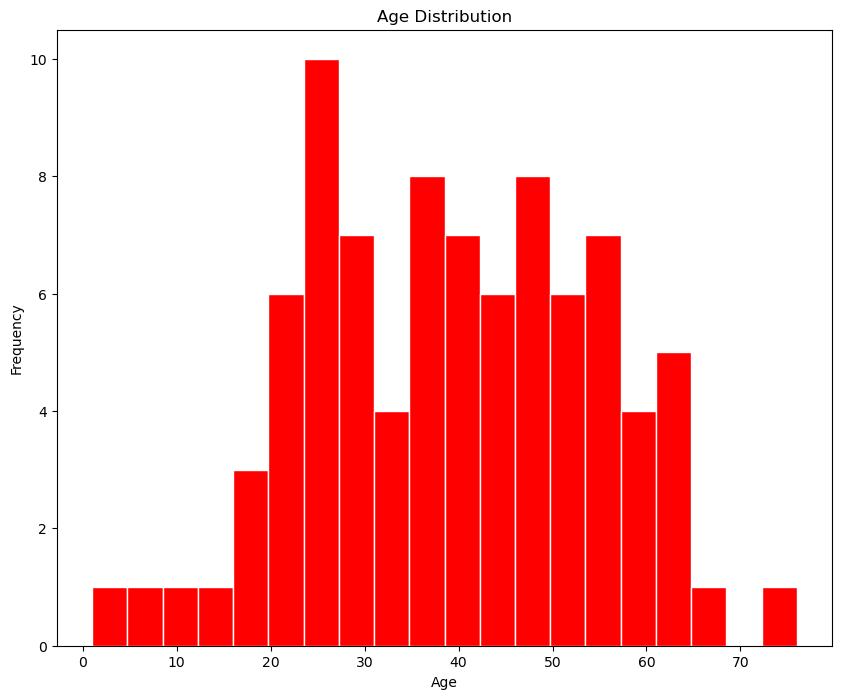

In [130]:
# Create a histogram for the distribution of ages.
plt.figure(figsize=(10,8))
plt.hist(data['Age'], bins=20, edgecolor='white',color='red')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

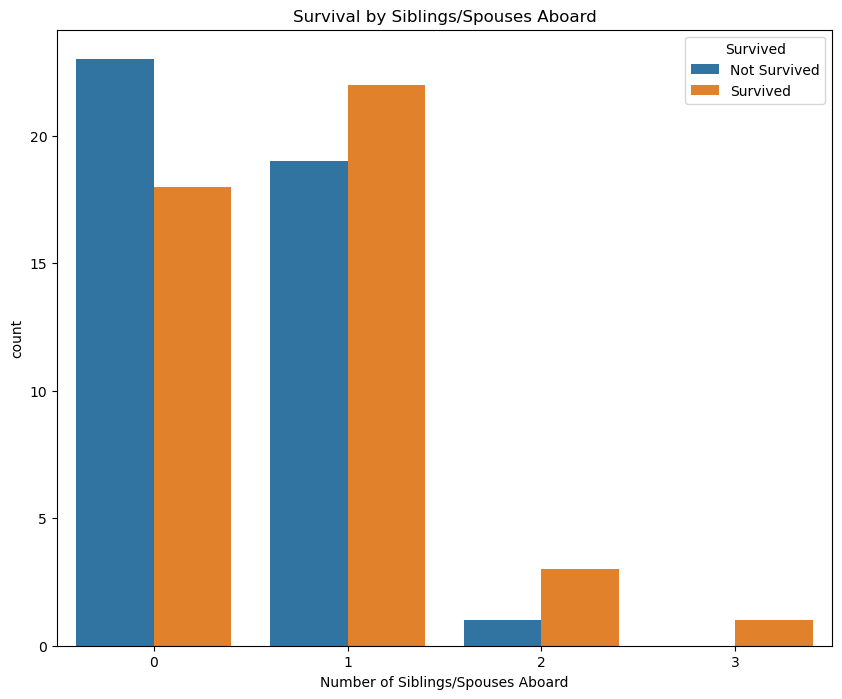

In [131]:
#Create a plot for survival based on the number of siblings/spouses board
plt.figure(figsize=(10,8))
sns.countplot(x='SibSp',hue='Survived',data=data)
plt.title("Survival by Siblings/Spouses Aboard")
plt.xlabel("Number of Siblings/Spouses Aboard")
plt.legend(title="Survived", labels=["Not Survived", "Survived"])
plt.show()

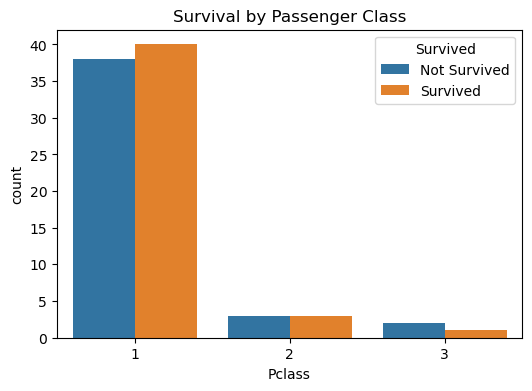

In [132]:
#Create a plot for survival based on passenger class (Pclass).
plt.figure(figsize=(6,4))
sns.countplot(x='Pclass',hue='Survived',data=data)
plt.title("Survival by Passenger Class")
plt.legend(title="Survived", labels=["Not Survived", "Survived"])
plt.show()

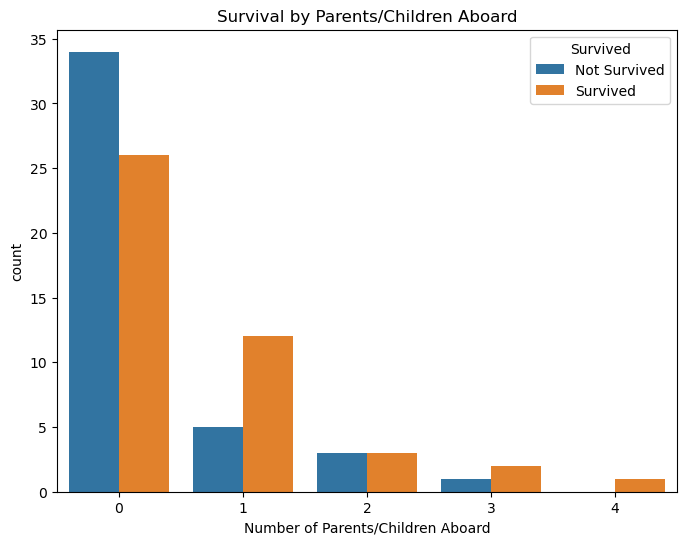

In [133]:
#Create a bar plot for survival based on the number of parents/children board 
plt.figure(figsize=(8,6))
sns.countplot(x='Parch',hue='Survived',data=data)
plt.title("Survival by Parents/Children Aboard")
plt.xlabel("Number of Parents/Children Aboard")
plt.legend(title="Survived", labels=["Not Survived", "Survived"])
plt.show()

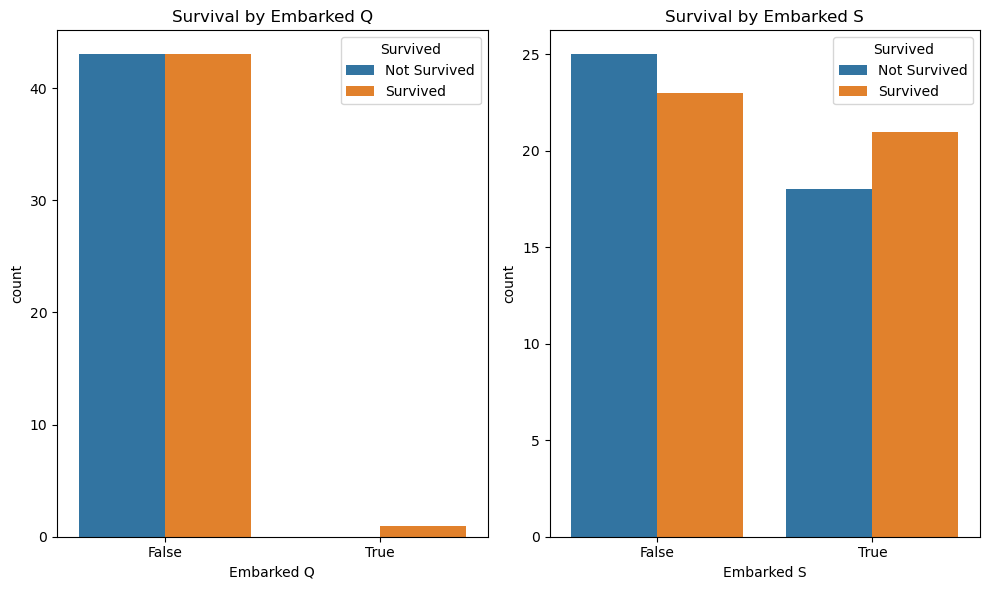

In [134]:
# Create bar plots for survival based on port of embarkation (Embarked_Q and Embarked_S).
plt.figure(figsize=(10, 6))

# Plot for Embarked_Q.
plt.subplot(1, 2, 1)
sns.countplot(x='Embarked_Q', hue='Survived', data=data)
plt.title("Survival by Embarked Q")
plt.xlabel("Embarked Q")
plt.legend(title="Survived", labels=["Not Survived", "Survived"])

# Plot for Embarked_S.
plt.subplot(1, 2, 2)
sns.countplot(x='Embarked_S', hue='Survived', data=data)
plt.title("Survival by Embarked S")
plt.xlabel("Embarked S")
plt.legend(title="Survived", labels=["Not Survived", "Survived"])

plt.tight_layout()
plt.show()

### Training Data

In [135]:
#seperate features and target variable
x=data.drop('Survived',axis=1)
y=data['Survived']

In [136]:
print(x,type(x))

    Pclass   Age  SibSp  Parch      Fare  sex  Embarked_Q  Embarked_S
0        1  23.0      1      0   82.2667    1       False        True
1        1  47.0      1      0   61.1750    1       False        True
2        1  48.0      1      3  262.3750    1       False       False
3        1  22.0      0      1   61.9792    1       False       False
4        1  41.0      0      0   30.5000    0       False        True
..     ...   ...    ...    ...       ...  ...         ...         ...
82       1  43.0      1      0   27.7208    0       False       False
83       2  20.0      0      0   13.8625    0       False       False
84       1  50.0      1      1  211.5000    0       False       False
85       1  37.0      1      0   90.0000    1        True       False
86       1  39.0      0      0  108.9000    1       False       False

[87 rows x 8 columns] <class 'pandas.core.frame.DataFrame'>


In [137]:
#Split the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

### Feature Scaling

In [138]:
scaler=StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)

x_test_scaled=scaler.fit_transform(x_test)



In [139]:
x_train_scaled.shape,x_test.shape

((69, 8), (18, 8))

### Choosing Regression model

In [140]:
# Train the model (Logistic Regression)
model = LogisticRegression()
model.fit(x_train_scaled, y_train)

LogisticRegression()

In [141]:
x_test_scaled

array([[-0.4472136 ,  1.04049577, -0.81649658, -0.57735027, -0.71267775,
        -1.11803399,  0.        ,  0.79772404],
       [-0.4472136 , -0.8471438 ,  0.40824829, -0.57735027, -0.45617513,
         0.89442719,  0.        ,  0.79772404],
       [-0.4472136 ,  1.51240566,  0.40824829, -0.57735027,  0.65287295,
         0.89442719,  0.        ,  0.79772404],
       [-0.4472136 ,  2.27925924,  0.40824829, -0.57735027, -0.48333602,
         0.89442719,  0.        ,  0.79772404],
       [-0.4472136 , -0.08029022, -0.81649658, -0.57735027,  0.97558736,
         0.89442719,  0.        , -1.25356634],
       [-0.4472136 , -0.43422264, -0.81649658, -0.57735027, -0.90346462,
        -1.11803399,  0.        ,  0.79772404],
       [-0.4472136 , -0.55220012,  2.85773803,  2.88675135,  0.98055577,
         0.89442719,  0.        ,  0.79772404],
       [-0.4472136 , -0.2867508 , -0.81649658, -0.57735027,  0.57115893,
        -1.11803399,  0.        , -1.25356634],
       [-0.4472136 ,  0.21465346

In [151]:
# Make predictions.
y_pred = model.predict(x_test_scaled)

### Prediction Scores

In [152]:
print(f"{' '*18}Logistic Regression Report\n")
print(classification_report(y_test, y_pred))

                  Logistic Regression Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        10

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



### Testing

In [150]:
# Checking the model.
input_data = [[1,23.0,1,0,82.2667,1,0,1]]

prediction = model.predict(input_data)
print(prediction)

[1]


0 - non survived

1 - survived